# Bài tập cuối kỳ môn Machine Learning: Giá thành của 1 laptop dựa trên cấu hình của máy và nhà sản xuất

## Thư viện

In [252]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Define các hàm để in ra sự so sánh (nếu có)

In [253]:
def visualize_metrics(metrics):
    
    # List of classifiers and metrics
    classifiers = list(metrics.keys())
    metric_names = list(metrics[classifiers[0]].keys())

    
    bar_width = 0.15  # Set the width of the bars
    padding = 0.05  # Adjust the padding value as desired

    # Set the positions of the x-axis ticks
    x_pos = np.arange(len(classifiers))

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the bar chart size

    # Plot each metric as a group of bars
    for i, metric in enumerate(metric_names):
        metric_values = [metrics[classifier][metric] for classifier in classifiers]
        bar_positions = x_pos + ((bar_width + padding) * i)
        ax.bar(bar_positions, metric_values, bar_width, label=metric)

    # Set the labels and title
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Metrics')
    ax.set_xticks(x_pos + (((bar_width + padding) * (len(metric_names) - 1)) / 2))
    ax.set_xticklabels(classifiers)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    
def print_metrics(accuracy, precision, recall, f1):
        print("Accuracy: " + str(accuracy))
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("F1-Score: " + str(f1))
        
    

## Phần 1 + Phần 4: Data Exploration + Data Preprocessing + Using Feature Selection for Reducing Overfitting

### Data cleaning

In [254]:
df = pd.DataFrame(pd.read_csv('laptopData.csv'))
df.drop('ID', axis=1, inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [255]:
df.size

14333

In [256]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [257]:
df.dropna(inplace=True)

In [258]:
df.duplicated().sum()

29

In [259]:
df.drop_duplicates(inplace=True)

### Data handling Categorical và Transformation


#### Kiểm tra bác kiểu Categorical

In [260]:
df['Company'].unique()


array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [261]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [262]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [263]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [264]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [265]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [266]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

#### Có thể thấy rằng Dataset này có vài Feature có giá trị chứa 2 dữ liệu có thể ảnh hưởng đến Giá thành, cho nên ở đây em sẽ bắt đầu tách các dữ liệu cần thiết.

In [267]:
df.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [268]:
# Đầu tiên là với Screen Resolution bao gồm loại màn và độ phân giải.

df['ScreenType'] = df['ScreenResolution'].apply(lambda x: (str(x))[:-9])
df['Resolution'] = df['ScreenResolution'].apply(lambda x: (str(x))[-9:])
df.drop('ScreenResolution', inplace=True, axis=1)
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,,1366x768
1270,Lenovo,2 in 1 Convertible,14,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800
1272,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,,1366x768


In [269]:
# Tiếp đến là CPU, có thể thấy là CPU gồm 3 yếu tố ảnh hưởng đến giá là công ty CPU, loại CPU và xung nhịp

df['Cpu'].astype(str)
df['CPU_Company'] = df['Cpu'].str.split(" ").apply(lambda x: x[0])
df['CPU_Type'] = df['Cpu'].str.split(" ").apply(lambda x: x[1:-1]).str.join(sep=" ")
df['CPU_Freq'] = df['Cpu'].apply(lambda x: (str(x))[-6:])
df.drop('Cpu', inplace=True, axis=1)
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel,Core i5,2.3GHz
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,,1440x900,Intel,Core i5,1.8GHz
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel,Core i5 7200U,2.5GHz
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel,Core i7,2.7GHz
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel,Core i5,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,,1366x768,Intel,Core i7 6500U,2.5GHz
1270,Lenovo,2 in 1 Convertible,14,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080,Intel,Core i7 6500U,2.5GHz
1271,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800,Intel,Core i7 6500U,2.5GHz
1272,Lenovo,Notebook,14,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,,1366x768,Intel,Celeron Dual Core N3050,1.6GHz


In [270]:
# Với phần Ổ cứng, có thể thấy rằng một số máy có thể được trang bị 2 ổ cứng

df['Memory'] = df['Memory'].astype(str)
df['Memory1'] = df['Memory'].str.split(r'\s*\+\s*').str.get(0)
df['Memory2'] = df['Memory'].str.split(r'\s*\+\s*').str.get(1)

df.drop('Memory', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel,Core i5,2.3GHz,128GB SSD,NaN
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,,1440x900,Intel,Core i5,1.8GHz,128GB Flash Storage,NaN
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel,Core i5 7200U,2.5GHz,256GB SSD,NaN
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel,Core i7,2.7GHz,512GB SSD,NaN
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel,Core i5,3.1GHz,256GB SSD,NaN


In [271]:
# Phần GPU - Card đồ họa có thể tách ra công ty card cùng với loại card của công ty đó

df['GPU_Company'] = df['Gpu'].apply(lambda x: x.split(" ",1)[0])
df['GPU_Name'] = df['Gpu'].apply(lambda x: x.split(" ",1)[1])
df.drop('Gpu', inplace=True, axis=1)
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2,GPU_Company,GPU_Name
0,Apple,Ultrabook,13.3,8GB,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel,Core i5,2.3GHz,128GB SSD,NaN,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8GB,macOS,1.34kg,47895.5232,,1440x900,Intel,Core i5,1.8GHz,128GB Flash Storage,NaN,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8GB,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel,Core i5 7200U,2.5GHz,256GB SSD,NaN,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16GB,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel,Core i7,2.7GHz,512GB SSD,NaN,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8GB,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel,Core i5,3.1GHz,256GB SSD,NaN,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4GB,Windows 10,2.2kg,38378.6496,,1366x768,Intel,Core i7 6500U,2.5GHz,500GB HDD,NaN,Nvidia,GeForce 920M
1270,Lenovo,2 in 1 Convertible,14,4GB,Windows 10,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080,Intel,Core i7 6500U,2.5GHz,128GB SSD,NaN,Intel,HD Graphics 520
1271,Lenovo,2 in 1 Convertible,13.3,16GB,Windows 10,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800,Intel,Core i7 6500U,2.5GHz,512GB SSD,NaN,Intel,HD Graphics 520
1272,Lenovo,Notebook,14,2GB,Windows 10,1.5kg,12201.1200,,1366x768,Intel,Celeron Dual Core N3050,1.6GHz,64GB Flash Storage,NaN,Intel,HD Graphics


In [272]:
# Hệ điều hành của máy có thể tách ra thành window và mac, tuy nhiên với phần phiên bản của hệ điều hành cần phải cập nhật bởi các ký tự cách nhau.

df['OpSys'] = df['OpSys'].str.replace('No OS', '', regex=1)
df['OpSys'] = df['OpSys'].str.replace('OS X', 'OSX', regex=1)
df['OpSys'] = df['OpSys'].str.replace('10 S', '10S', regex=1)
df['OpSys'] = df['OpSys'].str.replace('Chrome OS', 'ChromeOS', regex=1)

df['OpSys'].unique()

array(['macOS', '', 'Windows 10', 'Mac OSX', 'Linux', 'Windows 10S',
       'ChromeOS', 'Windows 7', 'Android'], dtype=object)

In [273]:
df[["OS_Name", "OS_Model"]] = df['OpSys'].str.split(" ", expand=True)
df.drop('OpSys', axis=1, inplace=True)
df

,Company,TypeName,Inches,Ram,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2,GPU_Company,GPU_Name,OS_Name,OS_Model
0,Apple,Ultrabook,13.3,8GB,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel,Core i5,2.3GHz,128GB SSD,NaN,Intel,Iris Plus Graphics 640,macOS,None
1,Apple,Ultrabook,13.3,8GB,1.34kg,47895.5232,,1440x900,Intel,Core i5,1.8GHz,128GB Flash Storage,NaN,Intel,HD Graphics 6000,macOS,None
2,HP,Notebook,15.6,8GB,1.86kg,30636.0000,Full HD,1920x1080,Intel,Core i5 7200U,2.5GHz,256GB SSD,NaN,Intel,HD Graphics 620,,None
3,Apple,Ultrabook,15.4,16GB,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel,Core i7,2.7GHz,512GB SSD,NaN,AMD,Radeon Pro 455,macOS,None
4,Apple,Ultrabook,13.3,8GB,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel,Core i5,3.1GHz,256GB SSD,NaN,Intel,Iris Plus Graphics 650,macOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4GB,2.2kg,38378.6496,,1366x768,Intel,Core i7 6500U,2.5GHz,500GB HDD,NaN,Nvidia,GeForce 920M,Windows,10
1270,Lenovo,2 in 1 Convertible,14,4GB,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080,Intel,Core i7 6500U,2.5GHz,128GB SSD,NaN,Intel,HD Graphics 520,Windows,10
1271,Lenovo,2 in 1 Convertible,13.3,16GB,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800,Intel,Core i7 6500U,2.5GHz,512GB SSD,NaN,Intel,HD Graphics 520,Windows,10
1272,Lenovo,Notebook,14,2GB,1.5kg,12201.1200,,1366x768,Intel,Celeron Dual Core N3050,1.6GHz,64GB Flash Storage,NaN,Intel,HD Graphics,Windows,10


In [274]:
df['Price'].round(0)
df

,Company,TypeName,Inches,Ram,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2,GPU_Company,GPU_Name,OS_Name,OS_Model
0,Apple,Ultrabook,13.3,8GB,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel,Core i5,2.3GHz,128GB SSD,NaN,Intel,Iris Plus Graphics 640,macOS,None
1,Apple,Ultrabook,13.3,8GB,1.34kg,47895.5232,,1440x900,Intel,Core i5,1.8GHz,128GB Flash Storage,NaN,Intel,HD Graphics 6000,macOS,None
2,HP,Notebook,15.6,8GB,1.86kg,30636.0000,Full HD,1920x1080,Intel,Core i5 7200U,2.5GHz,256GB SSD,NaN,Intel,HD Graphics 620,,None
3,Apple,Ultrabook,15.4,16GB,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel,Core i7,2.7GHz,512GB SSD,NaN,AMD,Radeon Pro 455,macOS,None
4,Apple,Ultrabook,13.3,8GB,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel,Core i5,3.1GHz,256GB SSD,NaN,Intel,Iris Plus Graphics 650,macOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4GB,2.2kg,38378.6496,,1366x768,Intel,Core i7 6500U,2.5GHz,500GB HDD,NaN,Nvidia,GeForce 920M,Windows,10
1270,Lenovo,2 in 1 Convertible,14,4GB,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080,Intel,Core i7 6500U,2.5GHz,128GB SSD,NaN,Intel,HD Graphics 520,Windows,10
1271,Lenovo,2 in 1 Convertible,13.3,16GB,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800,Intel,Core i7 6500U,2.5GHz,512GB SSD,NaN,Intel,HD Graphics 520,Windows,10
1272,Lenovo,Notebook,14,2GB,1.5kg,12201.1200,,1366x768,Intel,Celeron Dual Core N3050,1.6GHz,64GB Flash Storage,NaN,Intel,HD Graphics,Windows,10


### Data Exploration

#### Chuẩn hóa mô hình

In [277]:
df.dtypes

Company         object
TypeName        object
Inches          object
Ram             object
Weight          object
Price          float64
ScreenType      object
Resolution      object
CPU_Company     object
CPU_Type        object
CPU_Freq        object
Memory1         object
Memory2         object
GPU_Company     object
GPU_Name        object
OS_Name         object
OS_Model        object
dtype: object

In [278]:
le = LabelEncoder()

name = list(df.columns)
type = df.dtypes

for i in range(len(type)):
    if type[i] == 'object':
        le.fit_transform(df[name[i]])
        df[name[i]] = le.transform(df[name[i]])
        
df

C:\Users\Thinh\AppData\Local\Temp\ipykernel_26012\3412616424.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object':
C:\Users\Thinh\AppData\Local\Temp\ipykernel_26012\3412616424.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object':
C:\Users\Thinh\AppData\Local\Temp\ipykernel_26012\3412616424.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object':
C:\Users\Thinh\AppData\Lo

,Company,TypeName,Inches,Ram,Weight,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2,GPU_Company,GPU_Name,OS_Name,OS_Model
0,1,4,7,9,39,71378.6832,14,11,1,40,19,4,6,2,60,6,4
1,1,4,7,9,36,47895.5232,0,2,1,40,14,2,6,2,53,6,4
2,7,3,14,9,75,30636.0000,3,4,1,46,21,12,6,2,55,0,4
3,1,4,13,1,72,135195.3360,14,13,1,54,23,20,6,0,80,6,4
4,1,4,7,9,39,96095.8080,14,11,1,40,26,12,6,2,61,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2,3,14,6,115,38378.6496,0,1,1,55,21,17,6,3,7,5,0
1270,10,0,10,6,79,33992.6400,11,4,1,55,21,4,6,2,49,5,0
1271,10,0,7,1,42,79866.7200,13,14,1,55,21,20,6,2,49,5,0
1272,10,3,10,4,57,12201.1200,0,1,1,20,13,21,6,2,42,5,0


array([[<Axes: title={'center': 'Company'}>,
        <Axes: title={'center': 'TypeName'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'ScreenType'}>,
        <Axes: title={'center': 'Resolution'}>],
       [<Axes: title={'center': 'CPU_Company'}>,
        <Axes: title={'center': 'CPU_Type'}>,
        <Axes: title={'center': 'CPU_Freq'}>,
        <Axes: title={'center': 'Memory1'}>],
       [<Axes: title={'center': 'Memory2'}>,
        <Axes: title={'center': 'GPU_Company'}>,
        <Axes: title={'center': 'GPU_Name'}>,
        <Axes: title={'center': 'OS_Name'}>],
       [<Axes: title={'center': 'OS_Model'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

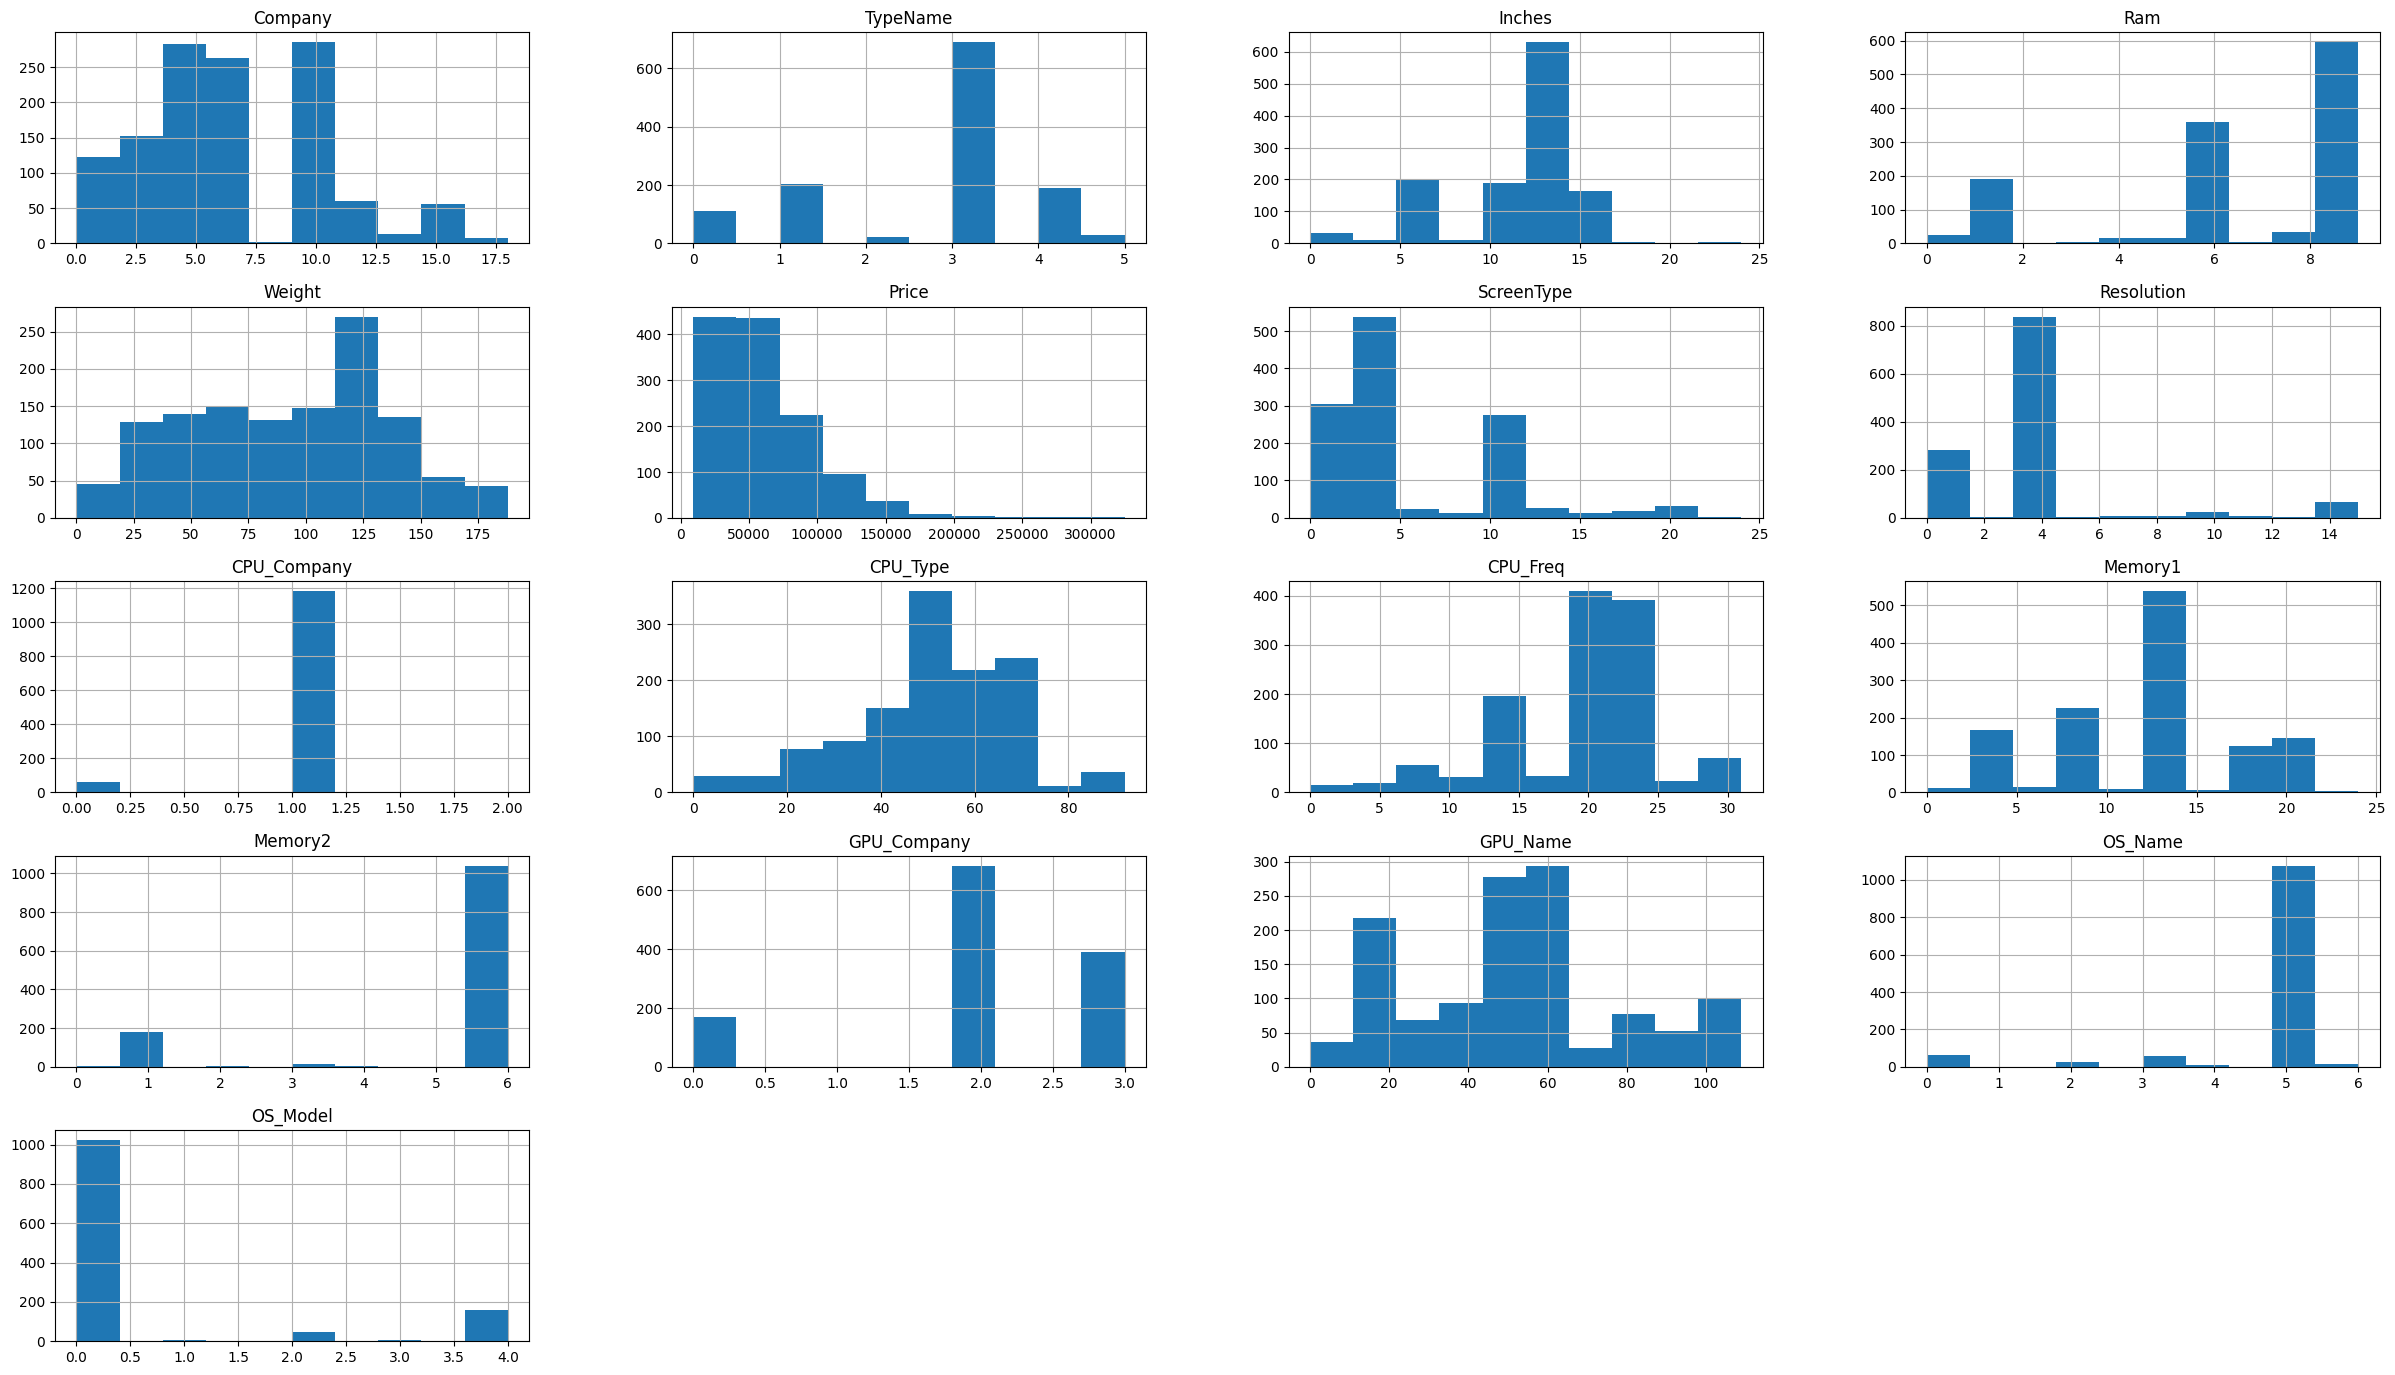

In [288]:
df.hist(figsize=(30, 17))

<Axes: >

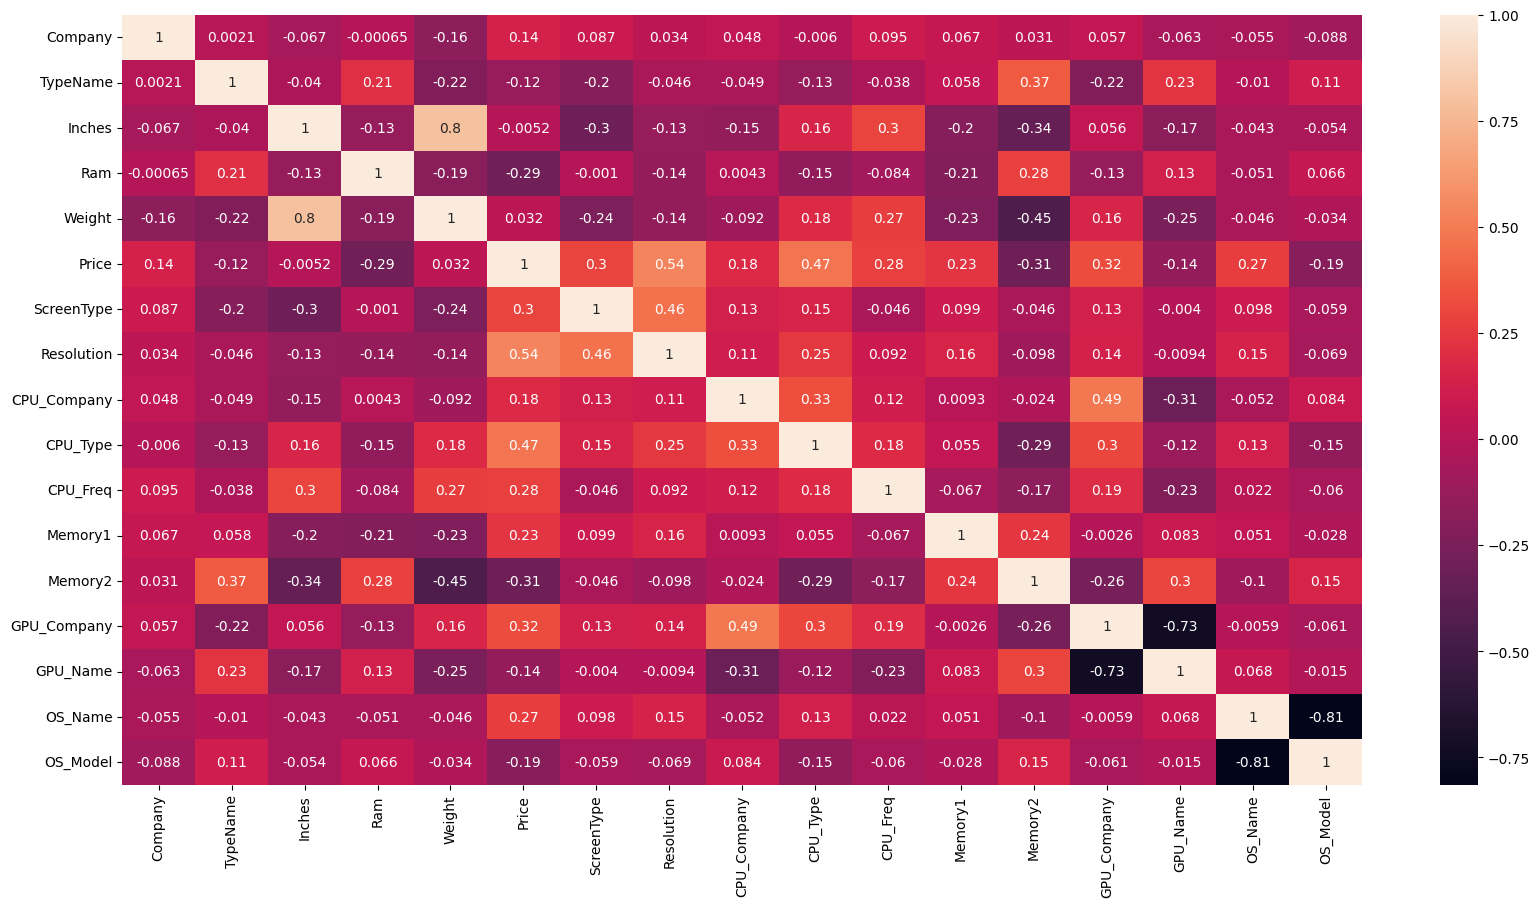

In [287]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [289]:
# # từ bản tương quan có thể thấy rằng bằng thạc sĩ hoặc cử nhân có tương quang tương đương nhau nên có thểm drop 1 trong 2
df.drop('OS_Model', axis=1, inplace=True)
df.drop('GPU_Company', axis=1, inplace=True)
df.drop('Weight', axis=1, inplace=True)

df.head()

,Company,TypeName,Inches,Ram,Price,ScreenType,Resolution,CPU_Company,CPU_Type,CPU_Freq,Memory1,Memory2,GPU_Name,OS_Name
0,1,4,7,9,71378.6832,14,11,1,40,19,4,6,60,6
1,1,4,7,9,47895.5232,0,2,1,40,14,2,6,53,6
2,7,3,14,9,30636.0000,3,4,1,46,21,12,6,55,0
3,1,4,13,1,135195.3360,14,13,1,54,23,20,6,80,6
4,1,4,7,9,96095.8080,14,11,1,40,26,12,6,61,6


<Axes: >

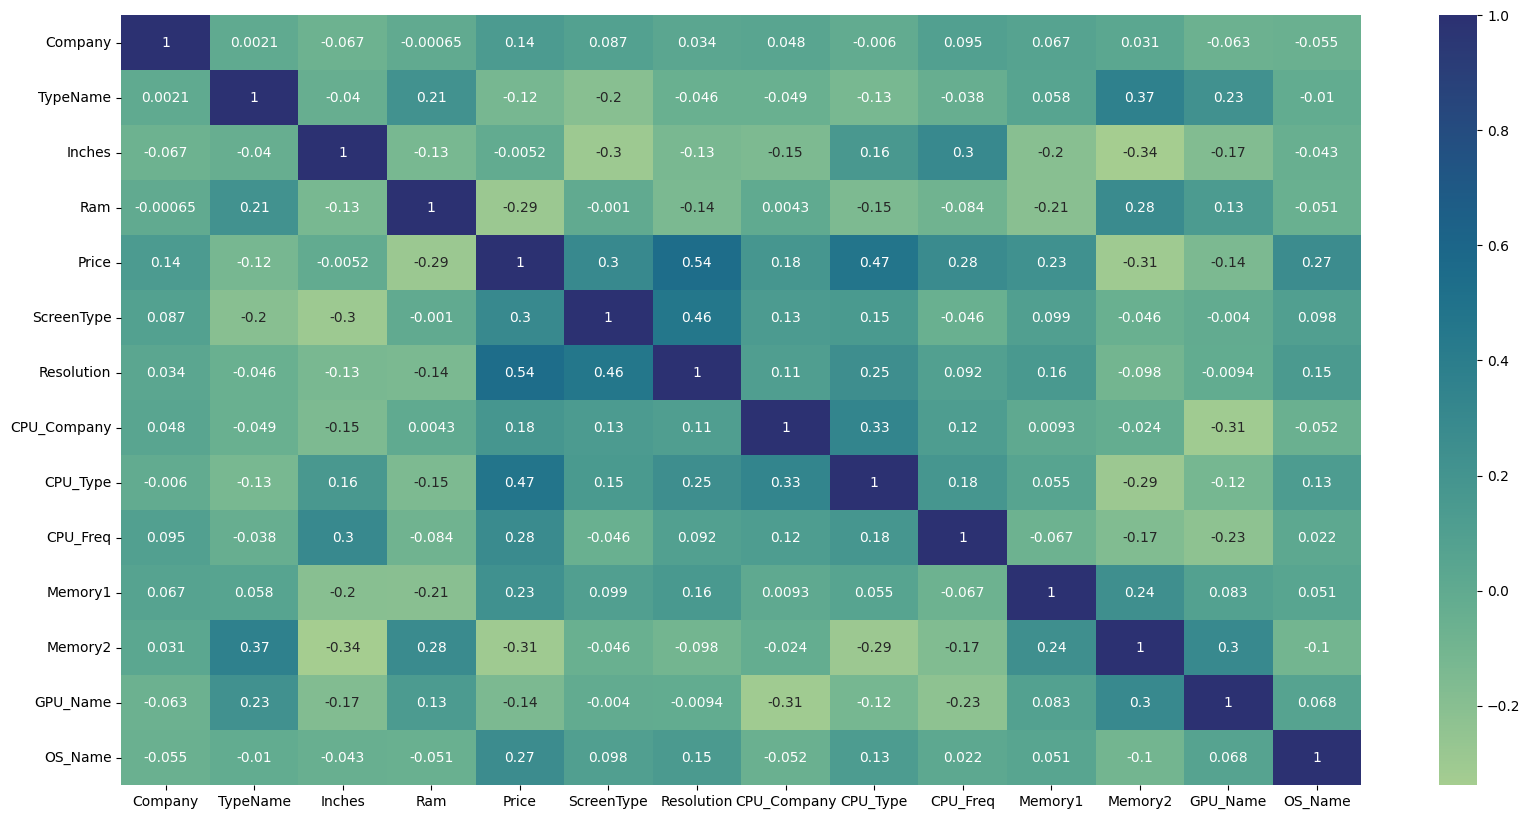

In [291]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="crest")

### Tách data



In [293]:
X = df.drop('Price', axis=1)
y = df['Price']

In [294]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5, test_size=0.3)

## Phần 2: Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       505
           1       0.63      0.60      0.61       325

    accuracy                           0.70       830
   macro avg       0.69      0.68      0.69       830
weighted avg       0.70      0.70      0.70       830



## Ứng dụng các mô hình học máy thuộc Ensemble Learing;

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)

print_metrics(gb_accuracy, gb_precision, gb_recall, gb_f1)


Accuracy: 0.7759036144578313
Precision: 0.7791164658634538
Recall: 0.5969230769230769
F1-Score: 0.6759581881533101


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred)

print_metrics(ada_accuracy, ada_precision, ada_recall, ada_f1)


Accuracy: 0.7337349397590361
Precision: 0.696969696969697
Recall: 0.5661538461538461
F1-Score: 0.6247877758913412


### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a base classifier
base_classifier = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(base_estimator=base_classifier)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

bagging_accuracy = accuracy_score(y_test, y_pred)
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)
bagging_f1 = f1_score(y_test, y_pred)

print_metrics(bagging_accuracy, bagging_precision, bagging_recall, bagging_f1)

Accuracy: 0.7180722891566265
Precision: 0.6491803278688525
Recall: 0.6092307692307692
F1-Score: 0.6285714285714286


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print_metrics(rf_accuracy, rf_precision, rf_recall, rf_f1)

Accuracy: 0.7265060240963855
Precision: 0.6590909090909091
Recall: 0.6246153846153846
F1-Score: 0.641390205371248


### Voting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Create individual classifiers
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred)
voting_precision = precision_score(y_test, y_pred)
voting_recall = recall_score(y_test, y_pred)
voting_f1 = f1_score(y_test, y_pred)

print_metrics(voting_accuracy, voting_precision, voting_recall, voting_f1)


Accuracy: 0.7650602409638554
Precision: 0.751937984496124
Recall: 0.5969230769230769
F1-Score: 0.6655231560891939


### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf)],
    final_estimator=lr_clf
)
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

stacking_accuracy = accuracy_score(y_test, y_pred)
stacking_precision = precision_score(y_test, y_pred)
stacking_recall = recall_score(y_test, y_pred)
stacking_f1 = f1_score(y_test, y_pred)

print_metrics(stacking_accuracy, stacking_precision, stacking_recall, stacking_f1)

Accuracy: 0.7759036144578313
Precision: 0.7704280155642024
Recall: 0.6092307692307692
F1-Score: 0.6804123711340206


### Hàm visualize_metrics sử dụng để so sánh hiệu suất của nhiều bộ phân loại (classifiers) khác nhau dựa trên các độ đo đánh giá như accuracy (độ chính xác), precision (độ chính xác dương tính), recall (độ phục hồi), và F1-score.

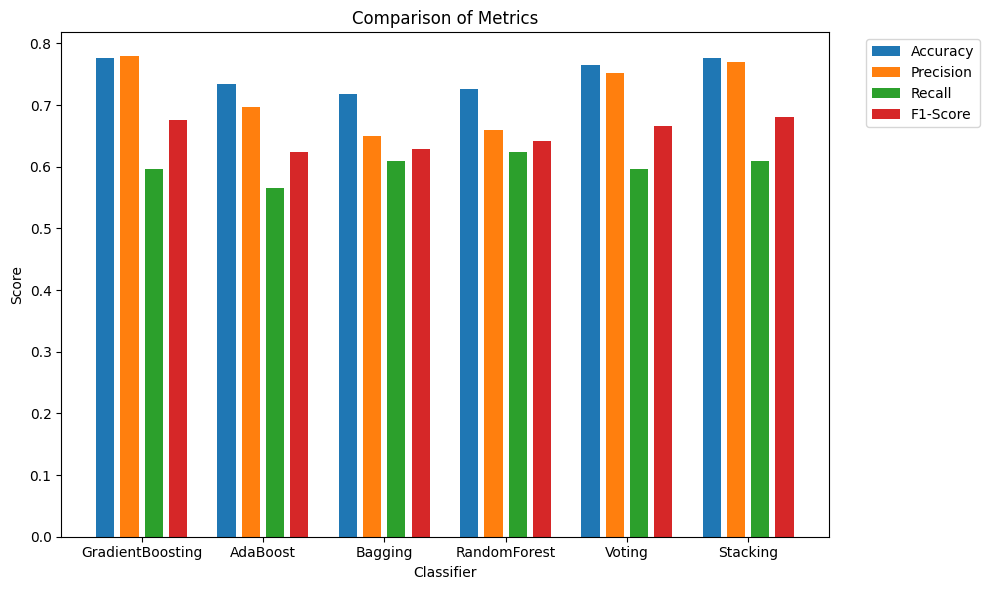

In [ ]:

metrics = {
    'GradientBoosting': {
        'Accuracy': gb_accuracy,
        'Precision': gb_precision,
        'Recall': gb_recall,
        'F1-Score': gb_f1
    },
    
    'AdaBoost': {
        'Accuracy': ada_accuracy,
        'Precision': ada_precision,
        'Recall': ada_recall,
        'F1-Score': ada_f1
    },
    
    'Bagging': {
        'Accuracy': bagging_accuracy,
        'Precision': bagging_precision,
        'Recall': bagging_recall,
        'F1-Score': bagging_f1
    },
    
    'RandomForest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1-Score': rf_f1
    },
    
    'Voting': {
        'Accuracy': voting_accuracy,
        'Precision': voting_precision,
        'Recall': voting_recall,
        'F1-Score': voting_f1
    },
    
    'Stacking': {
        'Accuracy': stacking_accuracy,
        'Precision': stacking_precision,
        'Recall': stacking_recall,
        'F1-Score': stacking_f1
    }
}

visualize_metrics(metrics=metrics)
